In [46]:
%load_ext autoreload
%autoreload 2

from text_detection.detector import TextDetector
from text_recognition.recognizer import TextRecognizer


from PIL import Image
import os
import numpy
import cv2
import json
import csv
import regex as re

from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
td = TextDetector()

Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/giangnv/.paddleocr/2.1/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/giangnv/.paddleocr/2.1/det/en', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='vi', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='./ppocr/utils/dict/latin_dict.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='/home/giangnv/.paddleocr/2.1/rec/latin', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)


In [31]:
tr = TextRecognizer()

File exists: /home/giangnv/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA


### II. Test with an image without defined function

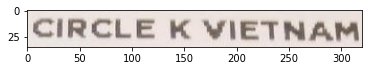

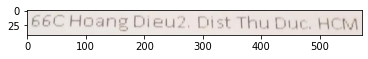

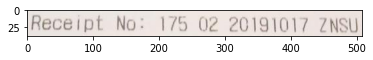

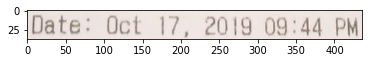

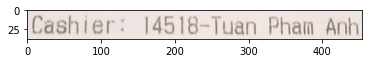

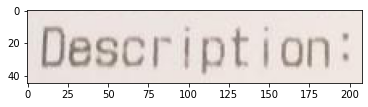

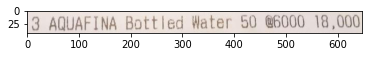

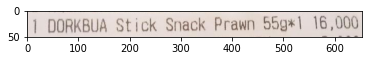

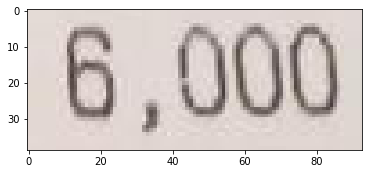

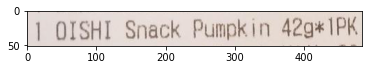

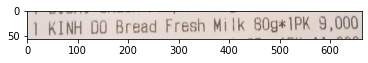

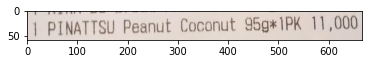

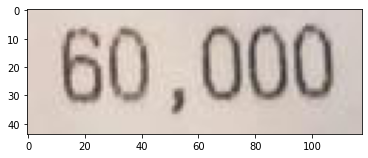

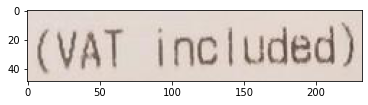

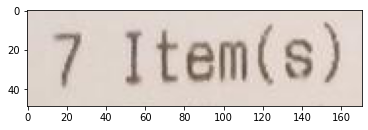

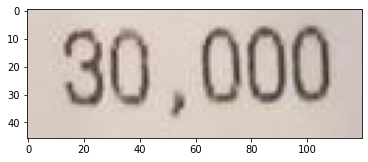

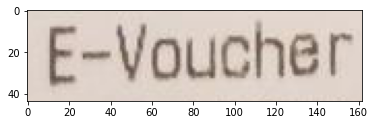

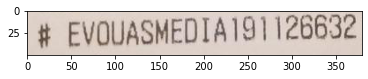

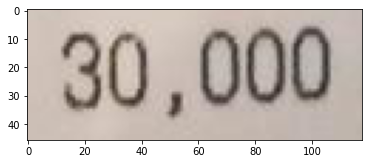

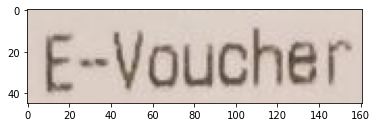

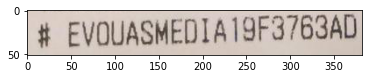

In [17]:
path_image = "./test/images/c32cc6d76afb48b591aafbc3aa0614e2.jpg"
image = Image.open(path_image)
bounding_boxes, bounding_boxes_images, result_as_dict = td.detect(image)

for bounding_boxes_image in bounding_boxes_images:
    plt.imshow(bounding_boxes_image)
    plt.show()

In [72]:
# result_as_dict

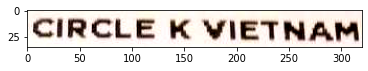

CIRCLE K VIETNAM


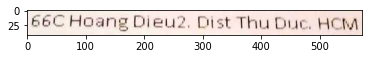

66C Hoang Dieu2. Dist Thu Duc. HCM


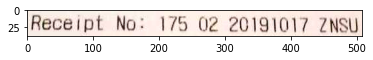

Receipt No: 175 02 20191017 ZNSU


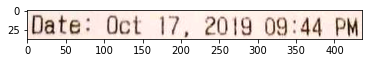

Date: Oct 17, 2019 09:44 PM


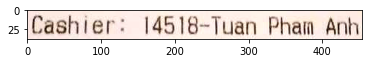

Cashier: 14518?Tuan Phan Anh


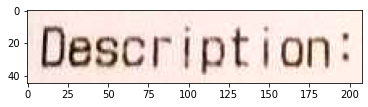

Description:


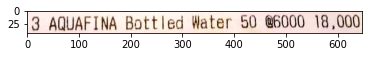

3 AQUAFINA Bottled Water 50 Q6000 18,000


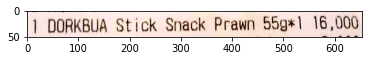

1 DORKBUA Stick Snack Prawn 55g%1 16,000


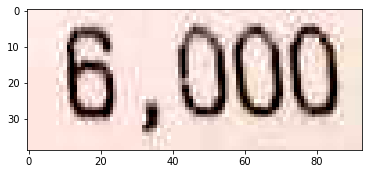

6,000


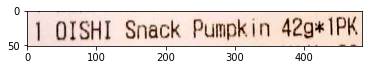

1 0ISHI Snack Pumpkin 42g% IPK


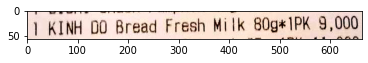

" KINH DO Bread Fresh Mi Ik 80g% IPK 9,000


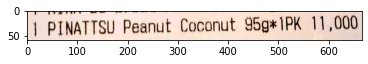

1 PINATTSu Peanut Coconut 95gx IPK 11,000


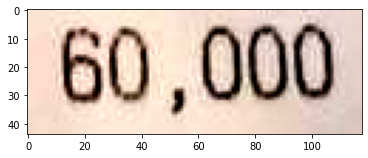

60,000


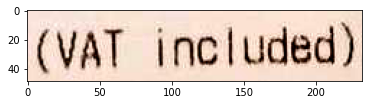

(VAT included)


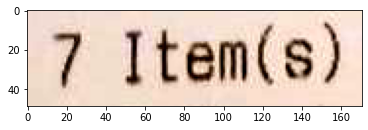

7 Item(s)


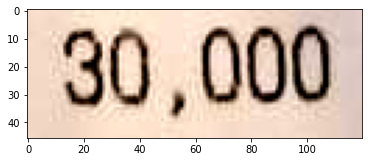

30,000


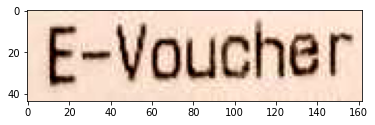

E-Voucher


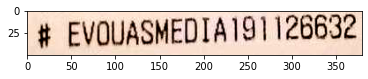

4 EVOUASMEDIA 191 126632


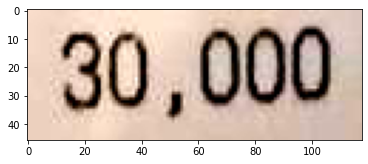

30,000


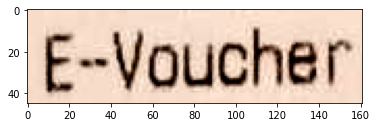

E-Voucher


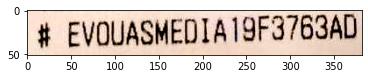

4 EVOUASMEDIA 19F3763AD


In [20]:
data, scripts = tr.recognize(data=result_as_dict)

In [73]:
# scripts

### III. Test with an image with defined function

In [69]:
td = TextDetector()
tr = TextRecognizer()

def recognize_from_path_image(path_image):
    
    try:
        image = Image.open(path_image).convert('RGB')
        _, _, result_as_dict = td.detect(image)

        #         for bounding_boxes_image in bounding_boxes_images:
        #             plt.imshow(bounding_boxes_image)
        #             plt.show()
        data, scripts = tr.recognize(data=result_as_dict, show_status = False)        
        # print(scripts)
        output = ""
        for script in scripts:
            # remove ignored characters
            script__ = re.sub('[^A-Za-z0-9 ]+', '', script)
            output = output + ' ' + script__
    except Exception as e:
        print(f"Error: {e}")
        return None, None, None
    return data, scripts, output

In [70]:
data, scripts, output = recognize_from_path_image(path_image)

In [74]:
# output

### IV. Prepare data

In [ ]:
import time


def prepare_data_folder(path_folders_in,
                       path_folder_root_out):
    
    if not os.path.exists(path_folders_in) or len(os.listdir(path_folders_in)) == 0:
        return False

    folder_in_name = path_folders_in.split("/")[-1]
    path_folders_out = os.path.join(path_folder_root_out, folder_in_name)
    # print(path_folders_out)
    if not os.path.exists(path_folders_out):
        os.makedirs(path_folders_out)
    
    for folder_name in os.listdir(path_folders_in):
        path_folder = os.path.join(path_folders_in, folder_name)
        for i, file_image in enumerate(os.listdir(path_folder)):            
            try:
                start_time = time.time()
                path_file_image = os.path.join(path_folder, file_image)
                # print(path_file_image)
                _, _, output = recognize_from_path_image(path_file_image) 
                if output == None:
                    continue
                print(type(output))
                print(output)
                
                file_txt = "{}_{:03d}.txt".format(folder_name, i)
                path_file_txt = os.path.join(path_folders_out, file_txt)
                with open(path_file_txt, "w") as wf:
                    wf.write(output)
                stop_time = time.time()
                print("Process time: {}".format(stop_time - start_time))
                    
            except Exception as e:
                print("Error: {}".format(e))
                continue
                
    return True

path_folder_in = "/home/giangnv/Desktop/projects_/ScanBill/workspace/documenClassifcation/google-images-download/dataset/living_electricpayment"
path_folder_root_out = "/home/giangnv/Desktop/projects_/ScanBill/workspace/documenClassifcation/viblo_document_classify/VNTC/Data/custom_data/full_converted_dataset"                                

prepare_data_folder(path_folder_in,
                   path_folder_root_out)                                            